# HW Zombies

In [1]:
#bigdir = '/Users/jkinser/Documents/CoursesKinser/CDSCardinal/Version5/'
#bigdir = '/home/jkinser/Documents/courses/CDSCardinal/Version5/'

bigdir = '/Users/eric/Documents/CDS465/'

pydir = bigdir + 'pysrc/'
datadir = bigdir + 'data/'
popdir = bigdir + 'population/'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#
import sys
sys.path.append( pydir )
# 
import Main

In [2]:
import zombie as zmb
import population, nomad
import scipy.integrate as sin

# Task 1
Below is the population equation. Show for three different values of $k$ that the population does become the value of the carrying capacity. For each _k_ value, create a plot of the population _x_.

$$\frac{ {\tt d}x}{{\tt d} t } = r x \left( 1 - \frac{x}{k} \right)$$

Use: 
* __scipy.integrate.odeint__
* _t_ is 100 time points from 0 to 20.
* Starting value of _x_ is 1.
* _r_ = 1
* Values of _k_ are 10, 20, 100

In [19]:
%%time
# your code plus plot
t = np.linspace(0,20,100)
x0, r = 1, 1
ks = (10,20,100)

def logdiffeq(x, t, k):
    dx_dt = r * x * (1 - x / k)
    return dx_dt

dxdt = np.array([sin.odeint(logdiffeq, x0, t, args=(ks[i],)) for i in range(3)])

CPU times: user 1.71 ms, sys: 89 μs, total: 1.8 ms
Wall time: 1.97 ms


In [20]:
%%time
# Lambda func
t = np.linspace(0,20,100)
x0, r = 1, 1
ks = (10,20,100)

dxdt = np.array([sin.odeint(lambda x, t, k:  (r*x * (1 - x/k)),x0,t,args=(ks[i],)) for i in range(3)])

CPU times: user 1.62 ms, sys: 19 μs, total: 1.64 ms
Wall time: 1.64 ms


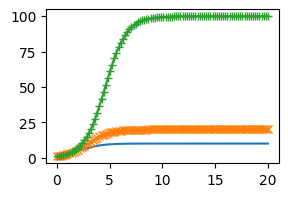

In [21]:
plt.figure( figsize=(3,2))
plt.plot(t,dxdt[0])
plt.plot(t,dxdt[1], marker='x')
plt.plot(t,dxdt[2], marker='+')
plt.show()

# Task 2
Below is the Lotka-Volterra equations

$$\frac{ {\tt d}x_1}{{\tt d} t } = r_1 x_1 \left( 1 - \frac{x_1 + \alpha_{12}x_2}{k_1} \right)$$


$$\frac{ {\tt d}x_2}{{\tt d} t } = r_2 x_2 \left( 1 - \frac{x_2 + \alpha_{21}x_1}{k_2} \right)$$

1. Write a function for __odeint__ to call for these two equations.
1. For all trials use: t = np.linspace(0, 20, 100). For each trial show a plot with both the x and y populations vs time.
1. Run a trial with the initial population of both x and y being 1. Use r1=1, r2=1 ,k1=100, k2=100, alpha12=1, alpha21=1. 
1. Change the trial such that one of the populations starts with 10.
1. Change the original trials such that growth rate for one population is increased by a factor of 10.
1. Change the original trials such that growth rate for one population is increased by a factor of 1.5.
1. Change the original trials such that interaction of species 2 on species 1 is reduced by a factor of 5.

In [22]:
# your function

t = np.linspace(0,20,100)
x1_0, x2_0 = 1, 1
"""r1, r2 = 1, 1
k1, k2 = 100, 100 
alpha12, alpha21 = 1,1"""

def lk_eq(x1x2, t, r1, r2, k1, k2, alpha12, alpha21):
    x1, x2 = x1x2

    dx1_dt = r1 * x1 * (1 - (x1 + alpha12 * x2)/k1)
    dx2_dt = r2 * x2 * (1 - (x2 + alpha21 * x1)/k2)
    #dx1x2_dt = (dx1_dt, dx2_dt)
    return (dx1_dt, dx2_dt)


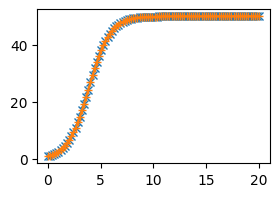

In [23]:
# trial 1 Run a trial with the initial population of both x1 and x2 being 1. Use r1=1, r2=1 ,k1=100, k2=100, alpha12=1, alpha21=1. 
dx1x2_dt = sin.odeint(lk_eq, (x1_0, x2_0), t, args=(1, 1, 100, 100, 1, 1,))

plt.figure( figsize=(3,2))
plt.plot(t,dx1x2_dt[:,0], marker='x')
plt.plot(t,dx1x2_dt[:,1], marker='+')
plt.show()

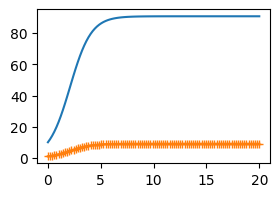

In [24]:
# trial 2 Change the trial such that one of the populations starts with 10.
dx1x2_dt = sin.odeint(lk_eq, (10, x2_0), t, args=(1, 1, 100, 100, 1, 1,))

plt.figure( figsize=(3,2))
plt.plot(t,dx1x2_dt[:,0])
plt.plot(t,dx1x2_dt[:,1], marker='+')
plt.show()

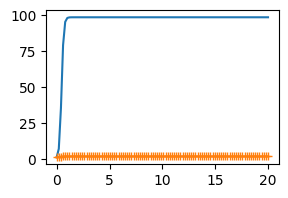

In [25]:
# trial 3 Change the original trials such that growth rate for one population is increased by a factor of 10.

#r1, r2, k1, k2, alpha12, alpha21
dx1x2_dt = sin.odeint(lk_eq, (x1_0, x2_0), t, args=(1*10, 1, 100, 100, 1, 1,))

plt.figure( figsize=(3,2))
plt.plot(t,dx1x2_dt[:,0])
plt.plot(t,dx1x2_dt[:,1], marker='+')
plt.show()

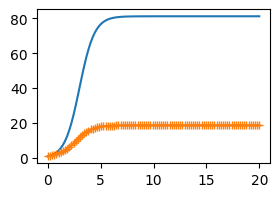

In [26]:
# trial 4 Change the original trials such that growth rate for one population is increased by a factor of 1.5.

#r1, r2, k1, k2, alpha12, alpha21
dx1x2_dt = sin.odeint(lk_eq, (x1_0, x2_0), t, args=(1*1.5, 1, 100, 100, 1, 1,))

plt.figure( figsize=(3,2))
plt.plot(t,dx1x2_dt[:,0])
plt.plot(t,dx1x2_dt[:,1], marker='+')
plt.show()

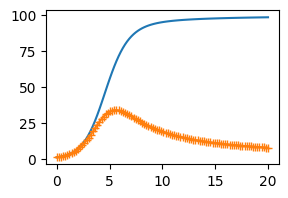

In [27]:
# trial 5 Change the original trials such that interaction of species 2 on species 1 is reduced by a factor of 5.

#r1, r2, k1, k2, alpha12, alpha21
dx1x2_dt = sin.odeint(lk_eq, (x1_0, x2_0), t, args=(1, 1, 100, 100, 1/5, 1,))

plt.figure( figsize=(3,2))
plt.plot(t,dx1x2_dt[:,0])
plt.plot(t,dx1x2_dt[:,1], marker='+')
plt.show()

# Task 3
I'm looking for a combination of parameters that will create a sustainable zombie population. I haven't found it yet. Your task is to run 3 trials with different parameters and graph the living human population and the zombie population vs time.

* Run each test for 120 months
* Plot the number of people and the number of zombies vs time for each trial

Parameters:
* Number of initial zombies
* movement radius
* number of months they can last without eating

In [28]:
# Load Population
E = Main.Realm( datadir )
E.ReadAll( popdir + 'pop3_6.db')
print( len(E.persondf))

82525


In [ ]:
def ZEvolve(E, Nmonths, addpeep, dometh, lim = 10, MoveCeil = 5, LMeal = 12, migrate=False):
    cct, zct, zombiesdf = [], [], zmb.MakeZombies(E, lim)
    for i in range(Nmonths):
        E.month += 1
        population.OneMonth(E, dometh, migrate=migrate)
        if addpeep>0: nomad.Immigrate(E, addpeep, dometh)

        # zombie stuff
        adults = zmb.AdultsIlocs(E)
        zombiesdf = zmb.MoveZombies( E, zombiesdf, adults, MoveCeil, MoveNorm=MoveCeil*2)
        zombiesdf = zmb.FeedZombies( E, zombiesdf, adults, 8, LMeal)
        ct_zomb = (zombiesdf['lastmeal']<=LMeal).sum()
        zct.append(ct_zomb)
        cct.append(len(E.persondf.loc[E.persondf['death']==-1]))

        if ct_zomb==0: break #zombiesdf = zmb.MakeZombies(E, 1) 

    return (cct, zct)

### Sample 3 Trials

#### TRIAL 1 
Parameters:
* Initial zombies: 10 
* Movement radius: 5
* Number of months they can last without eating: 12

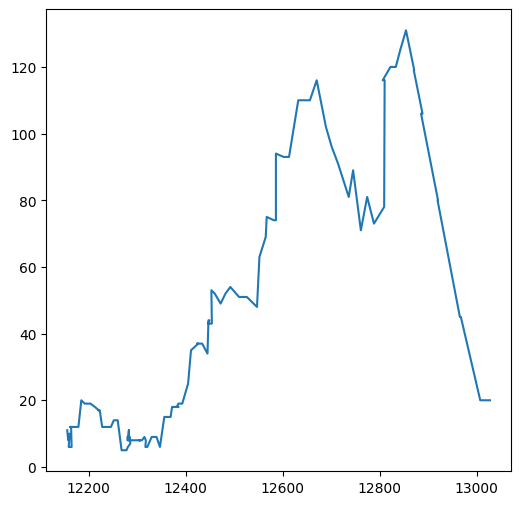

from begining 8200 to end 8320, 120 months have elapsed


In [13]:
# trial 1 plus graph
begin = E.month
(cct, zct) = ZEvolve(E, 10*12, 0, 0, 10, MoveCeil = 5, LMeal = 12, migrate=False )
plt.figure( figsize=(6,6))
plt.plot(cct, zct)
plt.show()
print(f"from begining {begin} to end {E.month}, {E.month-begin} months have elapsed")


#### TRIAL 2
Parameters:
* Initial zombies: 10
* Movement radius: 8
* Number of months they can last without eating: 18

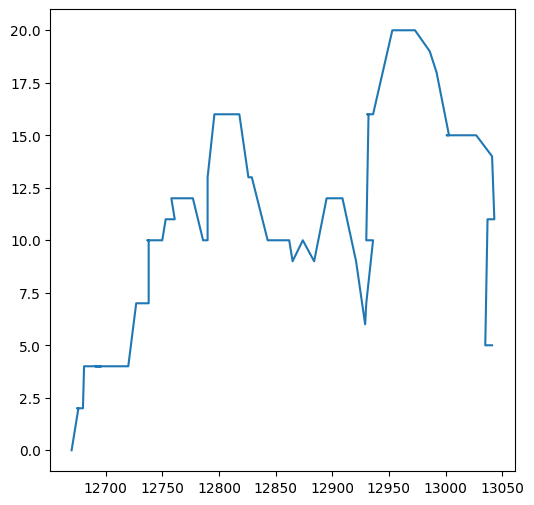

from begining 8200 to end 8271, 71 months have elapsed


In [ ]:
# trial 2 plus graph
begin = E.month
(cct, zct) = ZEvolve(E, 10*12, 0, 0, 10, MoveCeil = 8, LMeal = 18, migrate=False )
plt.figure( figsize=(6,6))
plt.plot(cct, zct)
plt.show()
print(f"from begining {begin} to end {E.month}, {E.month-begin} months have elapsed")


#### TRIAL 3
Parameters:
* Initial zombies: 10
* Movement radius: 4
* Number of months they can last without eating: 9

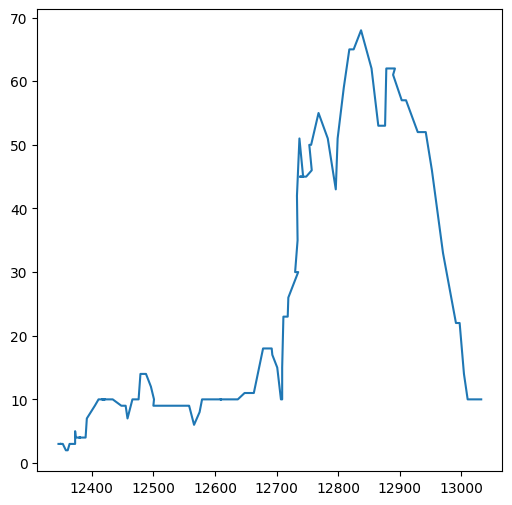

from begining 8200 to end 8320, 120 months have elapsed


In [ ]:
# trial 3 plus graph
begin = E.month
(cct, zct) = ZEvolve(E, 10*12, 0, 0, 10, MoveCeil = 6, LMeal = 18, migrate=False )
plt.figure( figsize=(6,6))
plt.plot(cct, zct)
plt.show()
print(f"from begining {begin} to end {E.month}, {E.month-begin} months have elapsed")

## Multiple tests

#### Flow of control:
1. TreadPoolExecutor
    * Schedules concurent runs given the number of tests to run in testargslist
        * appends run results to lists to store values for ploting
1. Call run
    * Resets G Realm object
    * Calls ZEvolve2 to run test_n 
        * Stores values returned by ZEvolve2
1. Call ZEvolve2 to run test
    * Prints plot of test_n
    * Pritns run params and tick num
    * Returns test parameters and population counts

In [35]:
#multiple runs

from concurrent.futures import ThreadPoolExecutor
from concurrent.futures import as_completed

In [ ]:
def ZEvolve2(E:Main, Nmonths:int, addpeep:int, dometh:int, lim:int, MoveCeil:int, LMeal:int, migrate=False) -> tuple[list[int], list, list]:
    cct, zct, zombiesdf = [], [], zmb.MakeZombies(E, lim)
    for i in range(Nmonths):
        E.month += 1
        population.OneMonth(E, dometh, migrate=migrate)
        if addpeep>0: nomad.Immigrate(E, addpeep, dometh)

        #if month 25 , 50 
        #plor populations

        # zombie stuff
        adults = zmb.AdultsIlocs(E)
        zombiesdf = zmb.MoveZombies( E, zombiesdf, adults, MoveCeil, MoveNorm=MoveCeil*2)
        zombiesdf = zmb.FeedZombies( E, zombiesdf, adults, 8, LMeal)
        ct_zomb = (zombiesdf['lastmeal']<=LMeal).sum()
        zct.append(ct_zomb)
        cct.append(len(E.persondf.loc[E.persondf['death']==-1]))

        if ct_zomb==0: break #zombiesdf = zmb.MakeZombies(E, 1) 

    return ([lim, MoveCeil, LMeal], cct, zct)

#n_years, n_zombies, move_rad, lmeal
def run(targs: list) -> tuple[list, list, list]:
    """
    Try 20 years (240 months); 
    This function accepts a list of paramters to test the ZEvolve function in order to tune the params for zombies to persist in this model

    inpts:
        targs (list): list of parameters to tune ZEvolve;
            formated as:
                [n_zombies, move_rad, lmeal] 
    opts:
        tuple[list, list, list]
            the parameters for the model
            the first list is the population count
            the second list is the zombie count
    """
    # Reload Population 
    G = Main.Realm( datadir )
    G.ReadAll( popdir + 'pop3_7.db') #### Replace with your population for testing!!!
    
    #run test
    begin = G.month
    (targ, cct, zct) = ZEvolve2(G, 20*12, 0, 0, targs[0], MoveCeil = targs[1], LMeal = targs[2], migrate=False )
    """ 
    plt.figure( figsize=(6,6))
    plt.plot(cct, zct)
    plt.title(label=f'Population Count vs Zombie Count Over {G.month - begin} months')
    plt.xlabel(xlabel='Human Population')
    plt.ylabel('Zombie Count')
    plt.show()
    """

    #plots
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
    ax1.plot(cct, zct)
    ax1.set_title(f'Human vs Zmb Over {G.month - begin} months')
    ax1.set_xlabel('Human Population')
    ax1.set_ylabel(f'Zombie Population with params={targ}')
    ax1.set_xlim((10000,15000))
    ax1.set_ylim((0,1750))

    ax2.plot(range(1,len(cct)+1), cct, color='gold', label='Human Count')
    ax2.plot(range(1,len(zct)+1), zct, color='g', label='Zombie Count')
    ax2.set_title(f'Human and Zmb Over {G.month - begin} months')
    ax2.set_xlabel(f'Time (Months); ends at month={len(cct)}')
    ax2.set_ylabel('Population Count')
    ax2.set_xlim((0,240))
    ax2.set_yscale('log')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    print(f"from begining {begin} to end {G.month}, {G.month-begin} months have elapsed")
    print(f"The targs where: initial zombies={targ[0]}, movement_radius={targ[1]}, and last_meal={targ[2]}")

    return (targ, cct, zct)

In [119]:
# [[n_zombies, move_rad, lmeal], ...] format
testargslist = [
    [10,5,12],
    [15,5,12],
    [10,8,12],
    [10,5,18],
    [15,8,18],
    [20,8,18],
    [10,5,24],
    [10,10,12],
    [10,10,18],
    [10,7,12],
    [15,7,12],
    [25,7,18]
]

#store opts from each run
params, ppcts, zbcts = [], [], []

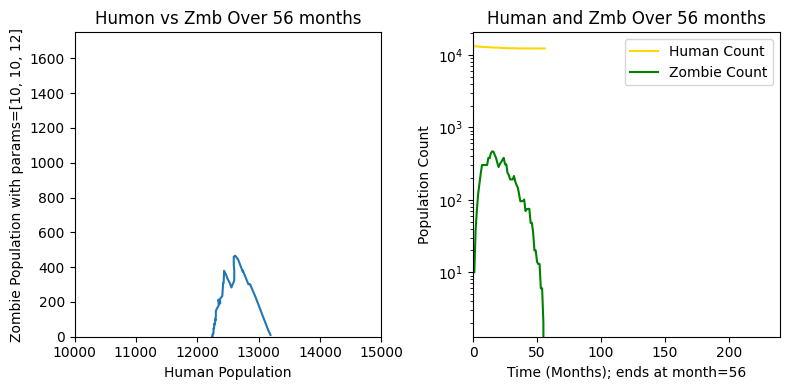

from begining 8320 to end 8376, 56 months have elapsed
The targs where: initial zombies=10, movement_radius=10, and last_meal=12


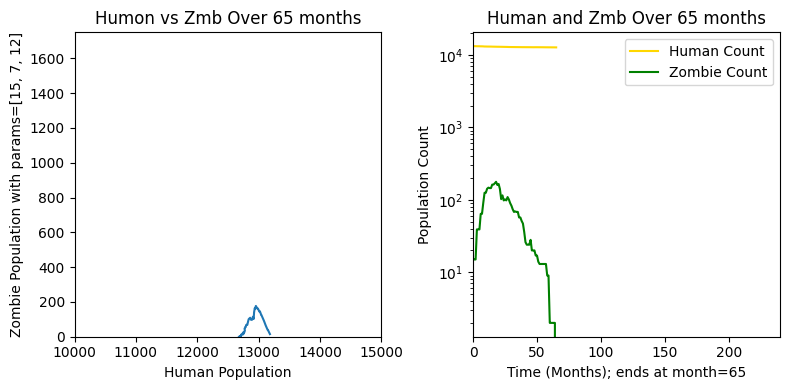

from begining 8320 to end 8385, 65 months have elapsed
The targs where: initial zombies=15, movement_radius=7, and last_meal=12


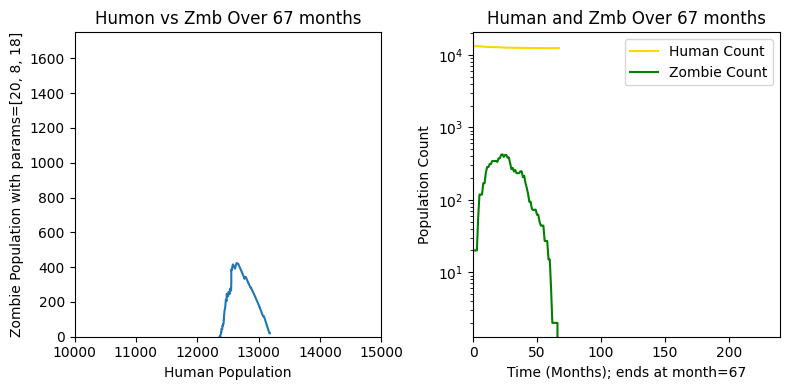

from begining 8320 to end 8387, 67 months have elapsed
The targs where: initial zombies=20, movement_radius=8, and last_meal=18


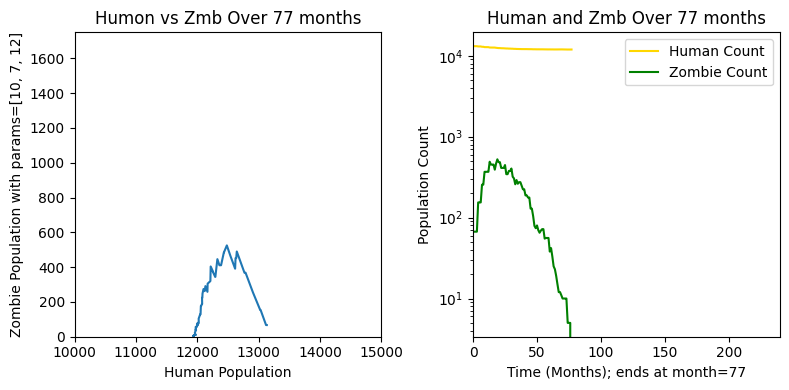

from begining 8320 to end 8397, 77 months have elapsed
The targs where: initial zombies=10, movement_radius=7, and last_meal=12


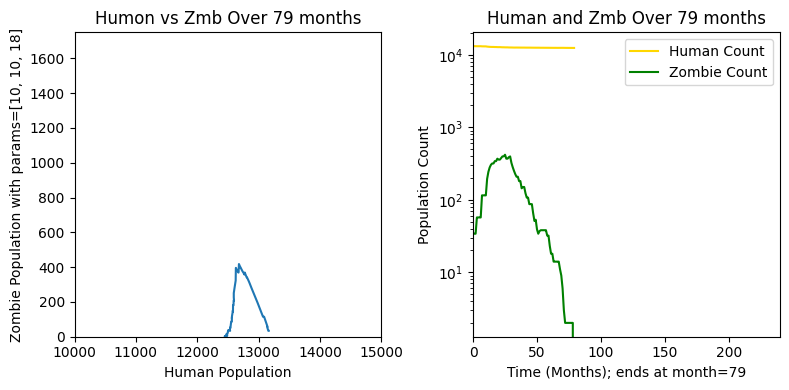

from begining 8320 to end 8399, 79 months have elapsed
The targs where: initial zombies=10, movement_radius=10, and last_meal=18


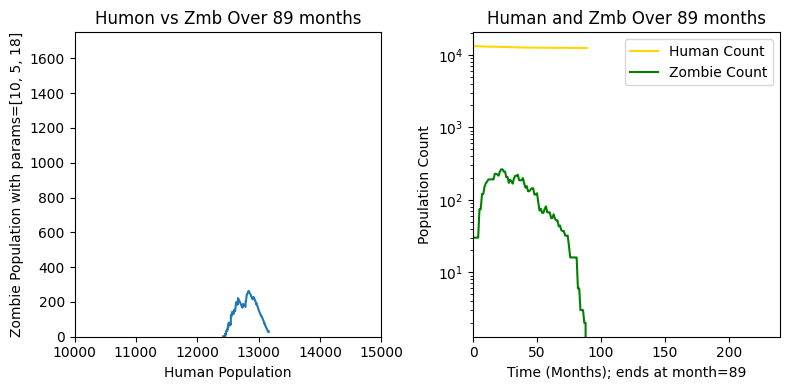

from begining 8320 to end 8409, 89 months have elapsed
The targs where: initial zombies=10, movement_radius=5, and last_meal=18


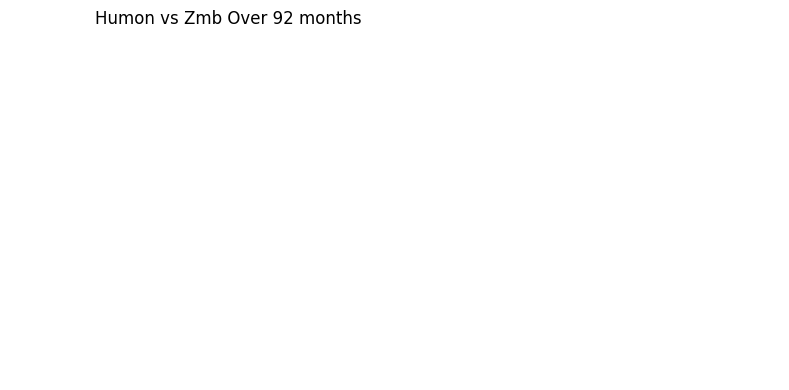

from begining 8320 to end 8412, 92 months have elapsed
The targs where: initial zombies=10, movement_radius=5, and last_meal=12


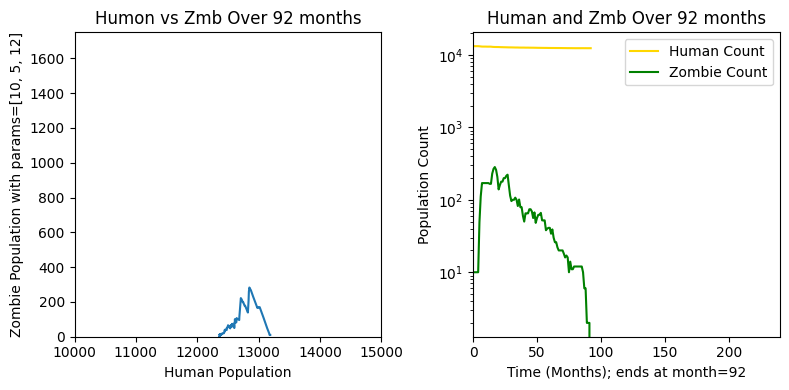

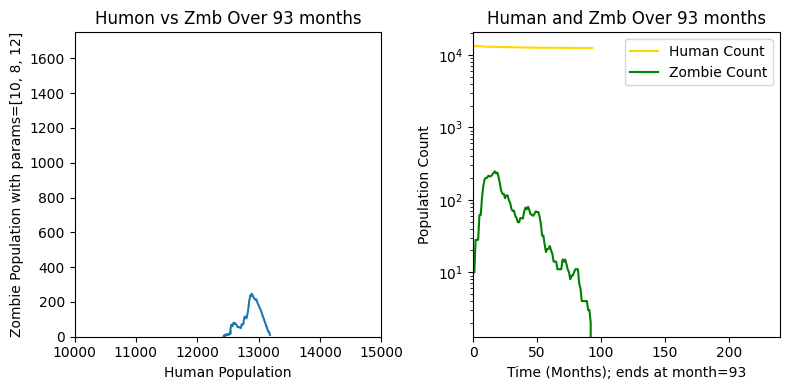

from begining 8320 to end 8413, 93 months have elapsed
The targs where: initial zombies=10, movement_radius=8, and last_meal=12


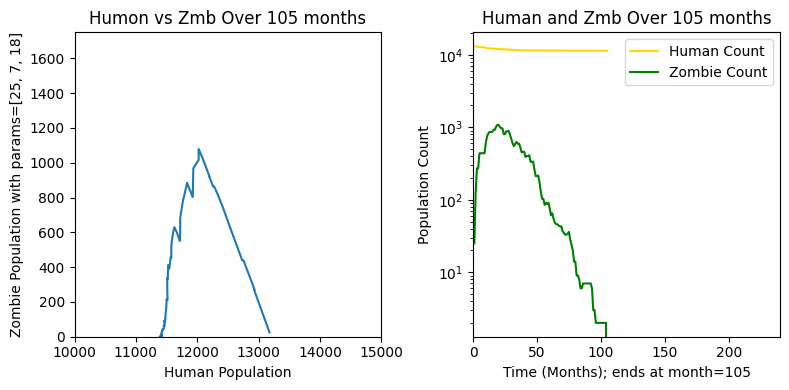

from begining 8320 to end 8425, 105 months have elapsed
The targs where: initial zombies=25, movement_radius=7, and last_meal=18


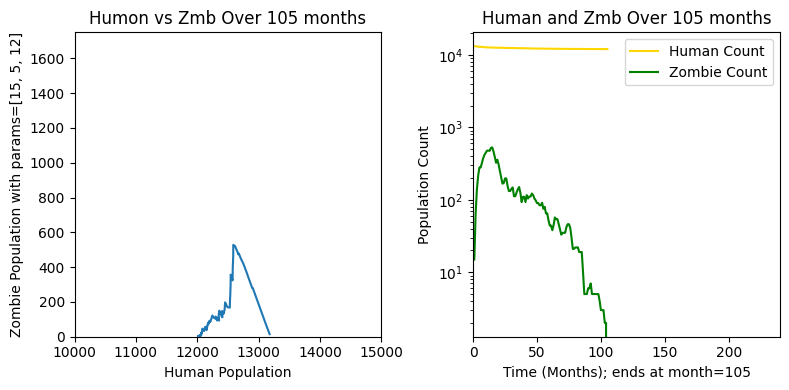

from begining 8320 to end 8425, 105 months have elapsed
The targs where: initial zombies=15, movement_radius=5, and last_meal=12


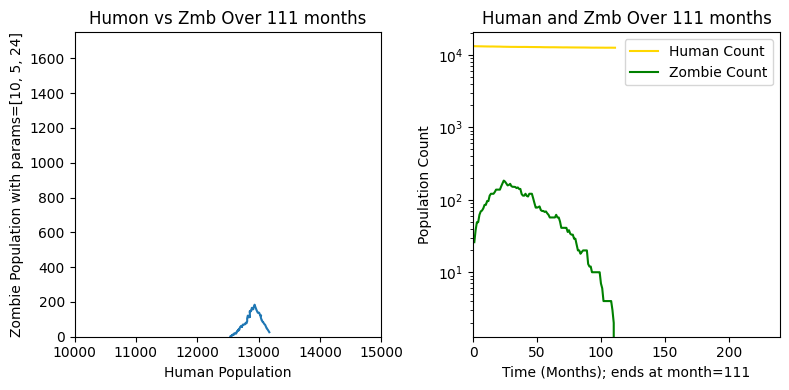

from begining 8320 to end 8431, 111 months have elapsed
The targs where: initial zombies=10, movement_radius=5, and last_meal=24


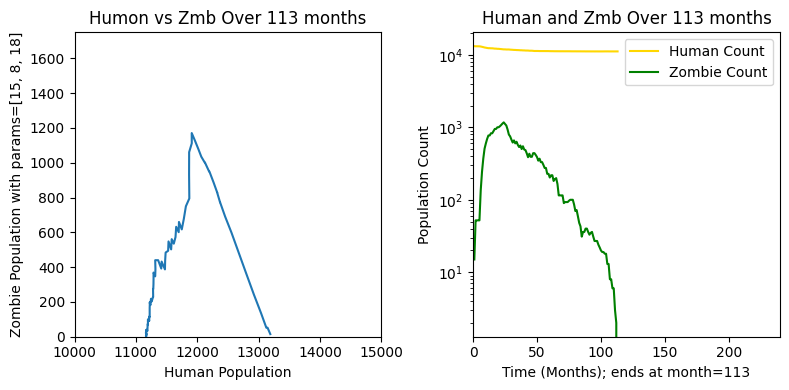

from begining 8320 to end 8433, 113 months have elapsed
The targs where: initial zombies=15, movement_radius=8, and last_meal=18


In [121]:
#use threadpool
with ThreadPoolExecutor(max_workers=len(testargslist)) as executor:
    futures = [executor.submit(run, t_arg) for t_arg in testargslist]
    for future in as_completed(futures):
        param, ppct, zbct = future.result()
        params.append(param)
        ppcts.append(ppct)
        zbcts.append(zbct)

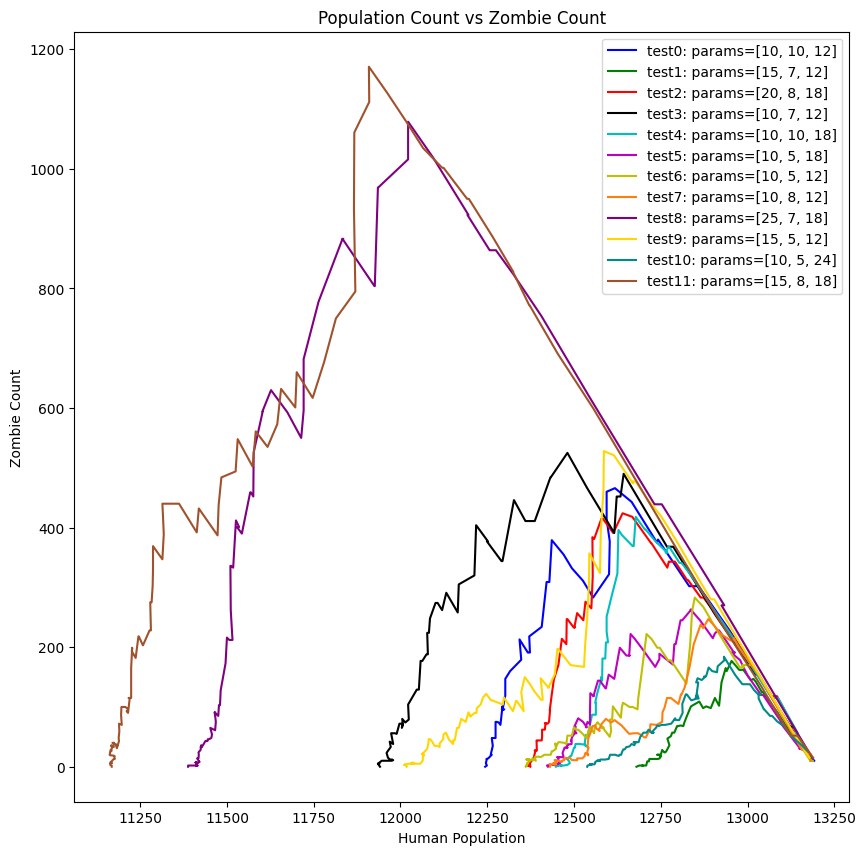

In [127]:
#tests = {f'test{i}': (ppcts[i], zbcts[i]) for i in range(len(testargslist))}
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y', 'tab:orange', 'purple', 'gold', 'darkcyan', 'sienna']

plt.figure( figsize=(10,10))
for i in range(len(testargslist)):
    plt.plot(ppcts[i], zbcts[i], color=colors[i], label=f"test{str(i)}: params={params[i]}")
plt.title('Population Count vs Zombie Count')
plt.xlabel('Human Population')
plt.ylabel('Zombie Count')
plt.legend()
plt.show()

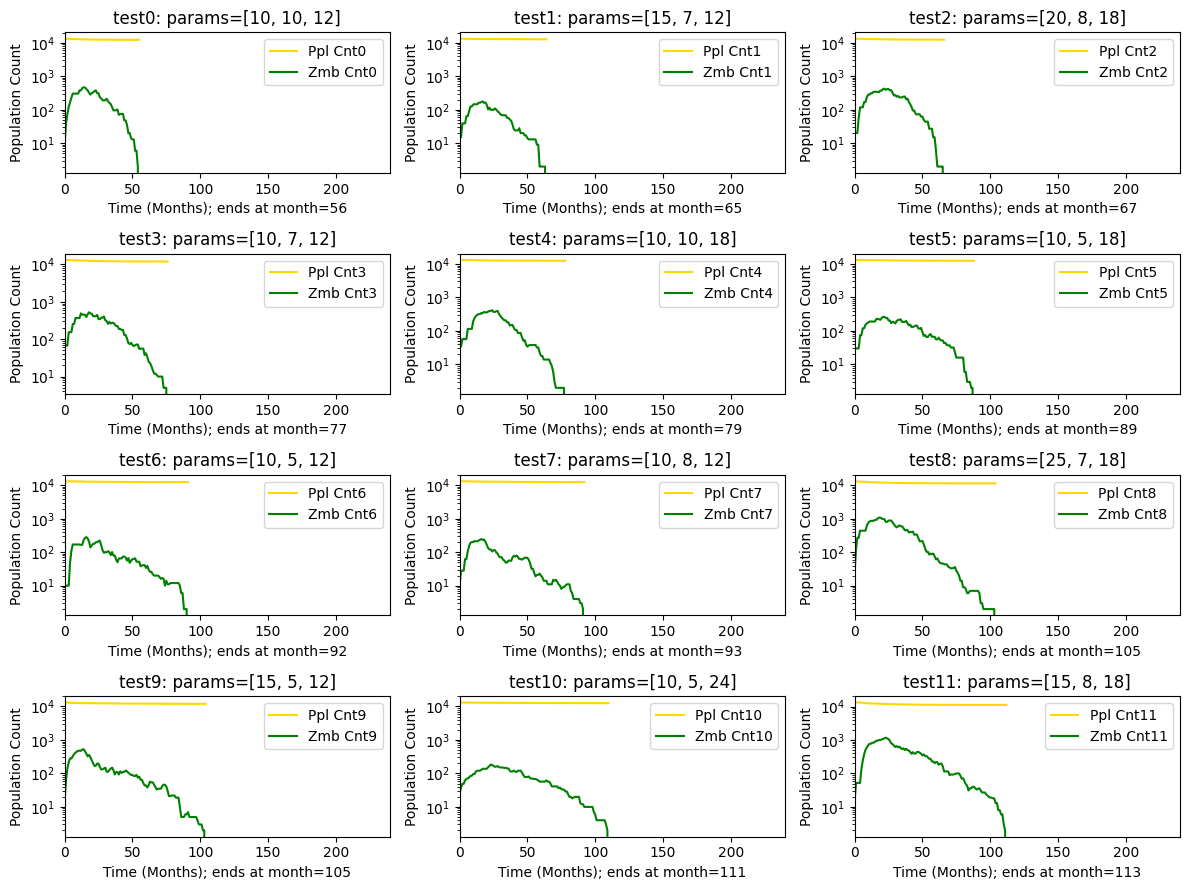

In [128]:
fig, axs = plt.subplots(4,3, figsize=(12, 9))
nth = 0
for r in range(4):
    for c in range(3):
        axs[r,c].plot(range(0,len(ppcts[nth])),ppcts[nth],label=f'Ppl Cnt{str(nth)}', color='gold')
        axs[r,c].plot(range(0,len(zbcts[nth])),zbcts[nth], label=f'Zmb Cnt{str(nth)}', color='g')
        axs[r,c].set_title(f'test{str(nth)}: params={params[nth]}')
        axs[r,c].set_xlim((0,240))
        axs[r,c].set_yscale('log')
        axs[r,c].legend()
        axs[r,c].set_xlabel(f'Time (Months); ends at month={len(ppcts[nth])}')
        axs[r,c].set_ylabel("Population Count")
        nth+=1

plt.tight_layout()

## Multiple tests with new MoveZombies

In [9]:
import scipy.ndimage as ndi 

def NewMoveZombies( E, zombiesdf, adults, MoveCeil=5, MoveNorm=10 ):
    # group and count
    adults[['ilocv','iloch']] = adults[['locv','loch']].astype(int)
    gadults = adults.groupby( ['ilocv','iloch']).count()
    gadults = gadults.reset_index()
    # make map
    ctmap = np.zeros(E.isle['terrain'].shape)
    x = gadults['iloch'].values
    y = gadults['ilocv'].values
    cts = gadults['pid'].values
    ctmap[y,x] = cts
    # map and gradient
    ctmap = ndi.gaussian_filter( ctmap, 12 )
    dx, dy = np.gradient( ctmap )
    # normalize to ZOmbie speed
    v = np.array( (dx.min(), dx.max(), dy.min(), dy.max()) )
    v = np.abs( v )

    print('v', v)

    mx = v.max()
    dx = dx * MoveNorm/mx
    dy = dy * MoveNorm/mx
    dx = np.maximum( dx, -MoveCeil ) #try q1; q3 of computed movements
    dx = np.minimum( dx, MoveCeil )
    dy = np.maximum( dy, -MoveCeil )
    dy = np.minimum( dy, MoveCeil )

    print('dx', dx)
    print()
    print('dy', dy)

    # get destination from map: does not use erratic
    zombiesdf[['ilocv','iloch']] = zombiesdf[['locv','loch']].astype(int)
    x = zombiesdf['iloch']
    y = zombiesdf['ilocv']
    zombiesdf['dv'] = dy[y,x]
    zombiesdf['dh'] = dx[y,x]
    # move zombie
    zombiesdf['locv'] += zombiesdf['dv']
    zombiesdf['loch'] += zombiesdf['dh']
    return zombiesdf
    

In [10]:
def ZEvolve2(E:Main, Nmonths:int, addpeep:int, dometh:int, lim:int, MoveCeil:int, LMeal:int, migrate=False, new_MoveZombie: bool = True) -> tuple[list[int], list, list]:
    cct, zct, zombiesdf = [], [], zmb.MakeZombies(E, lim)
    for i in range(Nmonths):
        E.month += 1
        population.OneMonth(E, dometh, migrate=migrate)
        if addpeep>0: nomad.Immigrate(E, addpeep, dometh)

        #if month 25 , 50 
        #plor populations

        # zombie stuff
        adults = zmb.AdultsIlocs(E)
        if new_MoveZombie:
            zombiesdf = NewMoveZombies( E, zombiesdf, adults, MoveCeil, MoveNorm=MoveCeil*2)
        else:
            zombiesdf = zmb.MoveZombies( E, zombiesdf, adults, MoveCeil, MoveNorm=MoveCeil*2)
        zombiesdf = zmb.FeedZombies( E, zombiesdf, adults, 8, LMeal)
        ct_zomb = (zombiesdf['lastmeal']<=LMeal).sum()
        zct.append(ct_zomb)
        cct.append(len(E.persondf.loc[E.persondf['death']==-1]))

        if ct_zomb==0: break #zombiesdf = zmb.MakeZombies(E, 1) 

    return ([lim, MoveCeil, LMeal], cct, zct)

#n_years, n_zombies, move_rad, lmeal
def run(targs: list) -> tuple[list, list, list]:
    """
    Try 20 years (240 months); 
    This function accepts a list of paramters to test the ZEvolve function in order to tune the params for zombies to persist in this model

    inpts:
        targs (list): list of parameters to tune ZEvolve;
            formated as:
                [n_zombies, move_rad, lmeal] 
    opts:
        tuple[list, list, list]
            the parameters for the model
            the first list is the population count
            the second list is the zombie count
    """
    # Reload Population 
    G = Main.Realm( datadir )
    G.ReadAll( popdir + 'pop3_7.db') #### Replace with your population for testing!!!
    
    #run test
    begin = G.month
    (targ, cct, zct) = ZEvolve2(G, 20*12, 0, 0, targs[0], MoveCeil = targs[1], LMeal = targs[2], migrate=False )
    """ 
    plt.figure( figsize=(6,6))
    plt.plot(cct, zct)
    plt.title(label=f'Population Count vs Zombie Count Over {G.month - begin} months')
    plt.xlabel(xlabel='Human Population')
    plt.ylabel('Zombie Count')
    plt.show()
    """

    #plots
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
    ax1.plot(cct, zct)
    ax1.set_title(f'Human vs Zmb Over {G.month - begin} months')
    ax1.set_xlabel('Human Population')
    ax1.set_ylabel(f'Zombie Population with params={targ}')
    ax1.set_xlim((10000,15000))
    ax1.set_ylim((0,1750))

    ax2.plot(range(1,len(cct)+1), cct, color='gold', label='Human Count')
    ax2.plot(range(1,len(zct)+1), zct, color='g', label='Zombie Count')
    ax2.set_title(f'Human and Zmb Over {G.month - begin} months')
    ax2.set_xlabel(f'Time (Months); ends at month={len(cct)}')
    ax2.set_ylabel('Population Count')
    ax2.set_xlim((0,240))
    ax2.set_yscale('log')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    print(f"from begining {begin} to end {G.month}, {G.month-begin} months have elapsed")
    print(f"The targs where: initial zombies={targ[0]}, movement_radius={targ[1]}, and last_meal={targ[2]}")

    return (targ, cct, zct)

In [ ]:
# [[n_zombies, move_rad, lmeal], ...] format
testargslist = [
    [10,5,12],
    [15,5,12],
    [10,8,12],
    [10,5,18],
    [15,8,18],
    [20,8,18],
    [10,5,24],
    [10,10,12],
    [10,10,18],
    [10,7,12],
    [15,7,12],
    [25,7,18]
]

#store opts from each run
params, ppcts, zbcts = [], [], []

In [ ]:
#use threadpool
with ThreadPoolExecutor(max_workers=len(testargslist)) as executor:
    futures = [executor.submit(run, t_arg) for t_arg in testargslist]
    for future in as_completed(futures):
        param, ppct, zbct = future.result()
        params.append(param)
        ppcts.append(ppct)
        zbcts.append(zbct)